- 원본 데이터

In [12]:
import os

# 경로 설정 (원하는 경로로 수정)
image_folder = "images/train"
label_folder = "labels/train"

# 이미지 파일 리스트 (png, jpg, jpeg)
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

positive_images = 0
negative_images = 0
no_label_images = 0

for img_file in image_files:
    # 이미지 파일명에서 확장자 제거 후 라벨 파일명 생성
    label_file = os.path.splitext(img_file)[0] + '.txt'
    label_path = os.path.join(label_folder, label_file)

    if not os.path.exists(label_path):
        no_label_images += 1
        continue

    with open(label_path, 'r') as f:
        lines = f.readlines()
        # 라벨 파일 내에 '1 '로 시작하는 줄이 있는지 확인
        if any(line.strip().startswith('1 ') for line in lines):
            positive_images += 1
        else:
            negative_images += 1

print(f"Positive 이미지 수: {positive_images}")
print(f"Negative 이미지 수: {negative_images}")
print(f"라벨 없는 이미지 수: {no_label_images}")



Positive 이미지 수: 459
Negative 이미지 수: 419
라벨 없는 이미지 수: 15


--------- 결과 ----------
Positive 이미지 수: 459
Negative 이미지 수: 419
라벨 없는 이미지 수: 15

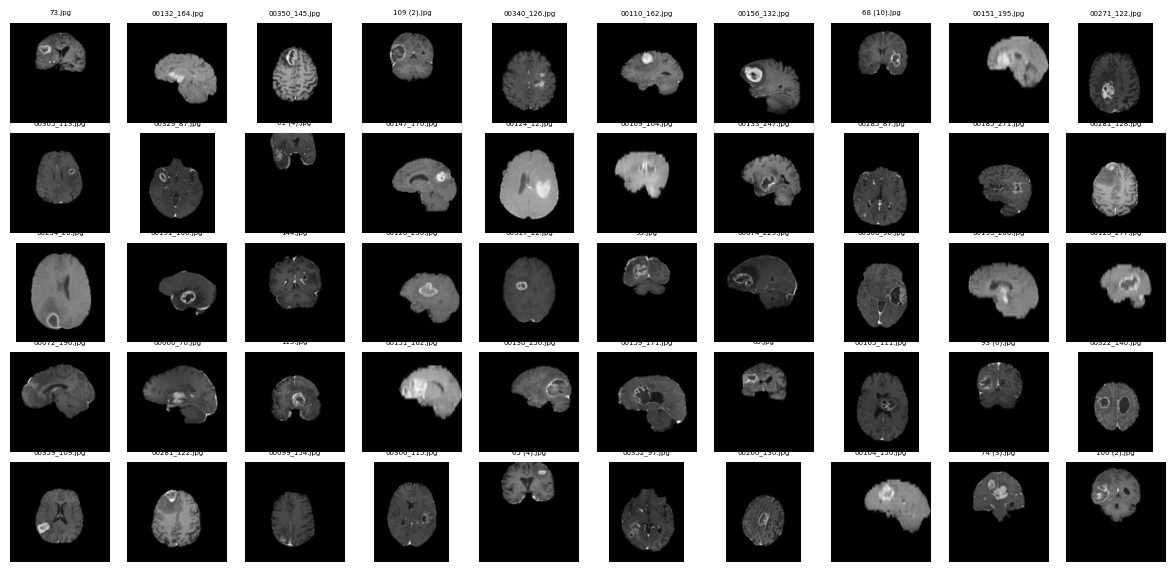

In [15]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 폴더 경로 
image_folder = "images/train"

# 이미지 파일 리스트
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

sample_count = 50
if len(image_files) < sample_count:
    sample_count = len(image_files)

sample_files = random.sample(image_files, sample_count)

cols, rows = 10, 5
fig, axes = plt.subplots(rows, cols, figsize=(15, 7))  # 전체 크기 줄임
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i, ax in enumerate(axes.flat):
    if i < sample_count:
        img_path = os.path.join(image_folder, sample_files[i])
        img = Image.open(img_path)
        img = img.convert("RGB")

        base_width = 90
        w_percent = (base_width / float(img.size[0]))
        h_size = int((float(img.size[1]) * float(w_percent)))

        try:
            resample_mode = Image.Resampling.LANCZOS
        except AttributeError:
            resample_mode = Image.ANTIALIAS

        img = img.resize((base_width, h_size), resample_mode)

        ax.imshow(img)
        ax.set_title(sample_files[i], fontsize=5)
    ax.axis('off')


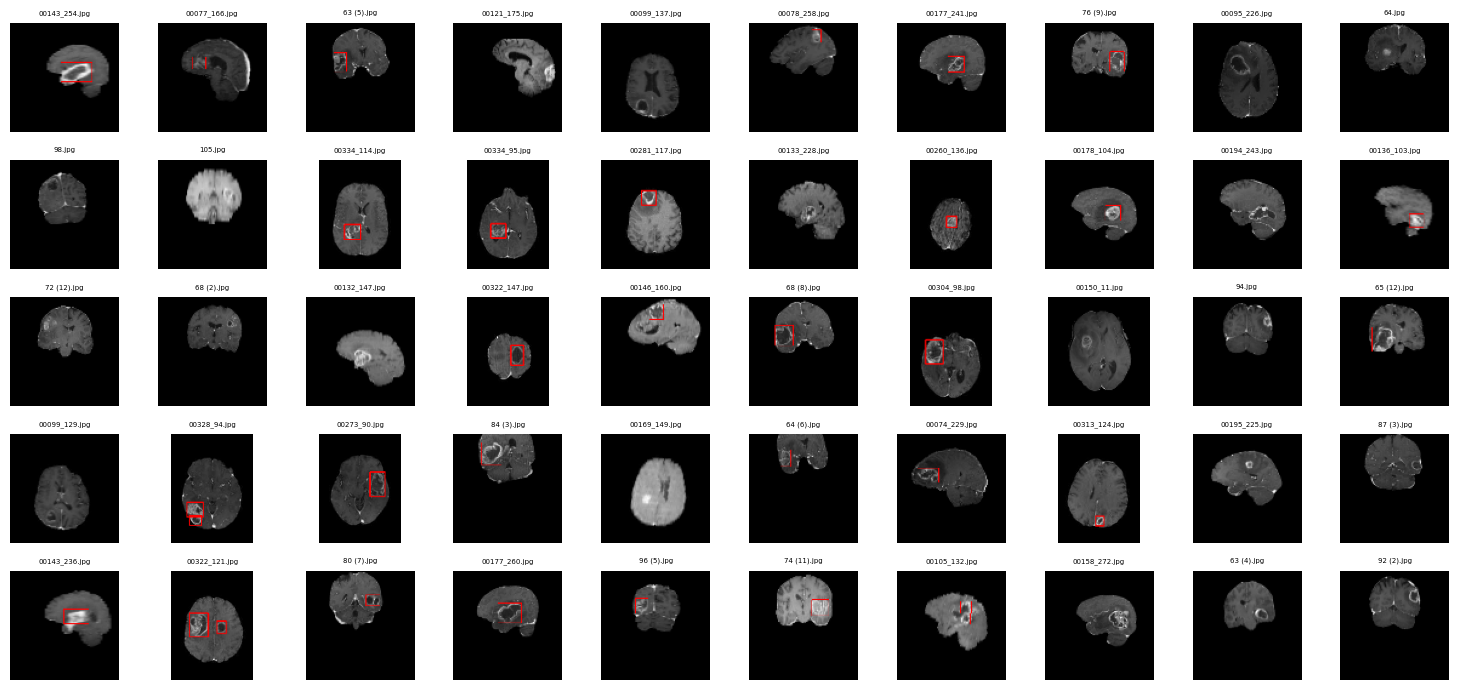

In [17]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# 경로 (본인 환경에 맞게 변경)
image_folder = "images/train"
label_folder = "labels/train"

# 이미지 리스트
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

sample_count = 50
if len(image_files) < sample_count:
    sample_count = len(image_files)

sample_files = random.sample(image_files, sample_count)

cols, rows = 10, 5
fig, axes = plt.subplots(rows, cols, figsize=(15, 7))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i, ax in enumerate(axes.flat):
    if i >= sample_count:
        ax.axis('off')
        continue

    img_name = sample_files[i]
    img_path = os.path.join(image_folder, img_name)
    label_name = os.path.splitext(img_name)[0] + '.txt'
    label_path = os.path.join(label_folder, label_name)

    # 이미지 읽기 (OpenCV는 BGR)
    img = cv2.imread(img_path)
    if img is None:
        ax.axis('off')
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w, _ = img.shape

    # 라벨 읽어서 박스 그리기
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) != 5:
                    continue
                cls, x_c, y_c, bw, bh = parts
                if cls != '1':  # positive class만 박스 그림
                    continue
                x_c, y_c, bw, bh = map(float, [x_c, y_c, bw, bh])

                # YOLO 형식 중심좌표->절대좌표 변환
                xmin = int((x_c - bw / 2) * w)
                ymin = int((y_c - bh / 2) * h)
                xmax = int((x_c + bw / 2) * w)
                ymax = int((y_c + bh / 2) * h)

                # 박스 그리기 (빨간색, 두께 2)
                cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    # 이미지 크기 조정 (가로 90픽셀)
    base_width = 90
    scale_ratio = base_width / w
    new_h = int(h * scale_ratio)
    img = cv2.resize(img, (base_width, new_h))

    ax.imshow(img)
    ax.set_title(img_name, fontsize=5)
    ax.axis('off')

plt.tight_layout()
plt.show()
